In [27]:
import os
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub

#### Don't copy code, make a function!!

In [2]:
def pd_to_tf(dataframe):
    return tf.data.Dataset.from_tensor_slices((tf.cast(dataframe['text'].values, tf.string), tf.cast(dataframe['fake'].values, tf.int32)))

# Train/Val/Test Split

In [3]:
# load data from json
df = pd.read_json('../data/classification.json', lines=True).drop('index', axis=1)

# shuffle rows
df = df.sample(frac=1, random_state=1816)

# manual train/val-test split
# training set
df_train = df.iloc[:int(df.shape[0]*.9)]
# training fold of training set
df_train = df_train.iloc[:int(df_train.shape[0]*.9)]
# validation fold of training set
df_val = df_train.iloc[int(df_train.shape[0]*.9):]
# test set
df_test = df.iloc[int(df.shape[0]*.9):]

## Convert pandas.DataFrame to tensorflow.Dataset

In [4]:
train_data = pd_to_tf(df_train)
validation_data = pd_to_tf(df_val)
test_data = pd_to_tf(df_test)

In [23]:
# embedding = 'https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1' # 15ms/step 0.1798 val loss 20 epochs
embedding = 'https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim-with-oov/1' # 15ms/step 0.1731 val loss 20 epochs
# embedding = 'https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1' # 289ms/step 0.0718 val loss 20 epochs
# embedding = 'https://tfhub.dev/google/nnlm-en-dim50-with-normalization/2' 273ms/step 0.0967 val loss 20 epochs


# embedding = 'https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1' # too big. error.

# embedding = 'https://tfhub.dev/tensorflow/albert_en_base/1'
# embedding = 'https://tfhub.dev/google/universal-sentence-encoder-lite/2' # error
# embedding = 'https://tfhub.dev/google/universal-sentence-encoder/4' # error: probably too big

In [24]:
# pre-trained weights
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)

# create model
model = tf.keras.Sequential([hub_layer, tf.keras.layers.Dense(16, activation='relu'), tf.keras.layers.Dense(1)])

# table of model architecture
model.summary()

# compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   (None, 20)                389380    
_________________________________________________________________
dense_6 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 389,733
Trainable params: 389,733
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "../training_checkpoints/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)


# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [31]:
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=200,
                    callbacks=[cp_callback],
                    validation_data=validation_data.batch(512),
                    verbose=1)

Train for 95 steps, validate for 10 steps
Epoch 1/200
94/95 [============================>.] - ETA: 0s - loss: 0.0082 - accuracy: 0.9968
Epoch 00001: saving model to ../training_checkpoints/cp-0001.ckpt
95/95 [==============================] - 2s 23ms/step - loss: 0.0082 - accuracy: 0.9968 - val_loss: 0.0081 - val_accuracy: 0.9961
Epoch 2/200
93/95 [============================>.] - ETA: 0s - loss: 0.0081 - accuracy: 0.9967
Epoch 00002: saving model to ../training_checkpoints/cp-0002.ckpt
95/95 [==============================] - 2s 23ms/step - loss: 0.0082 - accuracy: 0.9967 - val_loss: 0.0083 - val_accuracy: 0.9963
Epoch 3/200
94/95 [============================>.] - ETA: 0s - loss: 0.0081 - accuracy: 0.9968
Epoch 00003: saving model to ../training_checkpoints/cp-0003.ckpt
95/95 [==============================] - 2s 23ms/step - loss: 0.0081 - accuracy: 0.9968 - val_loss: 0.0080 - val_accuracy: 0.9961
Epoch 4/200
91/95 [===========================>..] - ETA: 0s - loss: 0.0081 - accurac

Epoch 29/200
94/95 [============================>.] - ETA: 0s - loss: 0.0077 - accuracy: 0.9966
Epoch 00029: saving model to ../training_checkpoints/cp-0029.ckpt
95/95 [==============================] - 2s 25ms/step - loss: 0.0077 - accuracy: 0.9966 - val_loss: 0.0077 - val_accuracy: 0.9967
Epoch 30/200
92/95 [============================>.] - ETA: 0s - loss: 0.0074 - accuracy: 0.9967
Epoch 00030: saving model to ../training_checkpoints/cp-0030.ckpt
95/95 [==============================] - 2s 23ms/step - loss: 0.0076 - accuracy: 0.9966 - val_loss: 0.0077 - val_accuracy: 0.9963
Epoch 31/200
91/95 [===========================>..] - ETA: 0s - loss: 0.0075 - accuracy: 0.9967
Epoch 00031: saving model to ../training_checkpoints/cp-0031.ckpt
95/95 [==============================] - 2s 23ms/step - loss: 0.0075 - accuracy: 0.9967 - val_loss: 0.0078 - val_accuracy: 0.9963
Epoch 32/200
94/95 [============================>.] - ETA: 0s - loss: 0.0076 - accuracy: 0.9967
Epoch 00032: saving model to

93/95 [============================>.] - ETA: 0s - loss: 0.0073 - accuracy: 0.9967
Epoch 00057: saving model to ../training_checkpoints/cp-0057.ckpt
95/95 [==============================] - 2s 26ms/step - loss: 0.0073 - accuracy: 0.9967 - val_loss: 0.0072 - val_accuracy: 0.9967
Epoch 58/200
93/95 [============================>.] - ETA: 0s - loss: 0.0073 - accuracy: 0.9968
Epoch 00058: saving model to ../training_checkpoints/cp-0058.ckpt
95/95 [==============================] - 3s 28ms/step - loss: 0.0072 - accuracy: 0.9968 - val_loss: 0.0073 - val_accuracy: 0.9963
Epoch 59/200
93/95 [============================>.] - ETA: 0s - loss: 0.0073 - accuracy: 0.9968
Epoch 00059: saving model to ../training_checkpoints/cp-0059.ckpt
95/95 [==============================] - 2s 25ms/step - loss: 0.0073 - accuracy: 0.9967 - val_loss: 0.0073 - val_accuracy: 0.9965
Epoch 60/200
94/95 [============================>.] - ETA: 0s - loss: 0.0071 - accuracy: 0.9967
Epoch 00060: saving model to ../training_

93/95 [============================>.] - ETA: 0s - loss: 0.0072 - accuracy: 0.9966
Epoch 00085: saving model to ../training_checkpoints/cp-0085.ckpt
95/95 [==============================] - 2s 23ms/step - loss: 0.0072 - accuracy: 0.9966 - val_loss: 0.0071 - val_accuracy: 0.9967
Epoch 86/200
92/95 [============================>.] - ETA: 0s - loss: 0.0072 - accuracy: 0.9966
Epoch 00086: saving model to ../training_checkpoints/cp-0086.ckpt
95/95 [==============================] - 2s 24ms/step - loss: 0.0071 - accuracy: 0.9966 - val_loss: 0.0073 - val_accuracy: 0.9969
Epoch 87/200
91/95 [===========================>..] - ETA: 0s - loss: 0.0070 - accuracy: 0.9968
Epoch 00087: saving model to ../training_checkpoints/cp-0087.ckpt
95/95 [==============================] - 2s 23ms/step - loss: 0.0071 - accuracy: 0.9967 - val_loss: 0.0072 - val_accuracy: 0.9969
Epoch 88/200
94/95 [============================>.] - ETA: 0s - loss: 0.0072 - accuracy: 0.9966
Epoch 00088: saving model to ../training_

Epoch 113/200
92/95 [============================>.] - ETA: 0s - loss: 0.0068 - accuracy: 0.9967
Epoch 00113: saving model to ../training_checkpoints/cp-0113.ckpt
95/95 [==============================] - 2s 23ms/step - loss: 0.0070 - accuracy: 0.9966 - val_loss: 0.0071 - val_accuracy: 0.9961
Epoch 114/200
91/95 [===========================>..] - ETA: 0s - loss: 0.0067 - accuracy: 0.9968
Epoch 00114: saving model to ../training_checkpoints/cp-0114.ckpt
95/95 [==============================] - 2s 25ms/step - loss: 0.0069 - accuracy: 0.9968 - val_loss: 0.0075 - val_accuracy: 0.9959
Epoch 115/200
92/95 [============================>.] - ETA: 0s - loss: 0.0069 - accuracy: 0.9968
Epoch 00115: saving model to ../training_checkpoints/cp-0115.ckpt
95/95 [==============================] - 2s 24ms/step - loss: 0.0069 - accuracy: 0.9968 - val_loss: 0.0068 - val_accuracy: 0.9967
Epoch 116/200
94/95 [============================>.] - ETA: 0s - loss: 0.0069 - accuracy: 0.9968
Epoch 00116: saving mode

Epoch 141/200
93/95 [============================>.] - ETA: 0s - loss: 0.0069 - accuracy: 0.9968 ETA: 0s - loss: 0.0067 - accuracy: 0.
Epoch 00141: saving model to ../training_checkpoints/cp-0141.ckpt
95/95 [==============================] - 2s 22ms/step - loss: 0.0069 - accuracy: 0.9967 - val_loss: 0.0072 - val_accuracy: 0.9967
Epoch 142/200
93/95 [============================>.] - ETA: 0s - loss: 0.0068 - accuracy: 0.9966
Epoch 00142: saving model to ../training_checkpoints/cp-0142.ckpt
95/95 [==============================] - 2s 23ms/step - loss: 0.0069 - accuracy: 0.9966 - val_loss: 0.0068 - val_accuracy: 0.9969
Epoch 143/200
92/95 [============================>.] - ETA: 0s - loss: 0.0067 - accuracy: 0.9967
Epoch 00143: saving model to ../training_checkpoints/cp-0143.ckpt
95/95 [==============================] - 2s 24ms/step - loss: 0.0069 - accuracy: 0.9967 - val_loss: 0.0067 - val_accuracy: 0.9967
Epoch 144/200
94/95 [============================>.] - ETA: 0s - loss: 0.0069 - acc

Epoch 169/200
93/95 [============================>.] - ETA: 0s - loss: 0.0068 - accuracy: 0.9966
Epoch 00169: saving model to ../training_checkpoints/cp-0169.ckpt
95/95 [==============================] - 2s 25ms/step - loss: 0.0068 - accuracy: 0.9966 - val_loss: 0.0070 - val_accuracy: 0.9965
Epoch 170/200
92/95 [============================>.] - ETA: 0s - loss: 0.0070 - accuracy: 0.9965
Epoch 00170: saving model to ../training_checkpoints/cp-0170.ckpt
95/95 [==============================] - 2s 24ms/step - loss: 0.0069 - accuracy: 0.9966 - val_loss: 0.0067 - val_accuracy: 0.9965
Epoch 171/200
94/95 [============================>.] - ETA: 0s - loss: 0.0068 - accuracy: 0.9968
Epoch 00171: saving model to ../training_checkpoints/cp-0171.ckpt
95/95 [==============================] - 2s 25ms/step - loss: 0.0068 - accuracy: 0.9968 - val_loss: 0.0073 - val_accuracy: 0.9961
Epoch 172/200
92/95 [============================>.] - ETA: 0s - loss: 0.0067 - accuracy: 0.9968
Epoch 00172: saving mode

Epoch 197/200
92/95 [============================>.] - ETA: 0s - loss: 0.0065 - accuracy: 0.9969
Epoch 00197: saving model to ../training_checkpoints/cp-0197.ckpt
95/95 [==============================] - 2s 23ms/step - loss: 0.0066 - accuracy: 0.9967 - val_loss: 0.0067 - val_accuracy: 0.9971
Epoch 198/200
91/95 [===========================>..] - ETA: 0s - loss: 0.0067 - accuracy: 0.9968
Epoch 00198: saving model to ../training_checkpoints/cp-0198.ckpt
95/95 [==============================] - 2s 22ms/step - loss: 0.0067 - accuracy: 0.9968 - val_loss: 0.0066 - val_accuracy: 0.9969
Epoch 199/200
92/95 [============================>.] - ETA: 0s - loss: 0.0067 - accuracy: 0.9965
Epoch 00199: saving model to ../training_checkpoints/cp-0199.ckpt
95/95 [==============================] - 2s 24ms/step - loss: 0.0067 - accuracy: 0.9966 - val_loss: 0.0068 - val_accuracy: 0.9969
Epoch 200/200
92/95 [============================>.] - ETA: 0s - loss: 0.0065 - accuracy: 0.9968
Epoch 00200: saving mode

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'gnews swivel 20dim with oov')

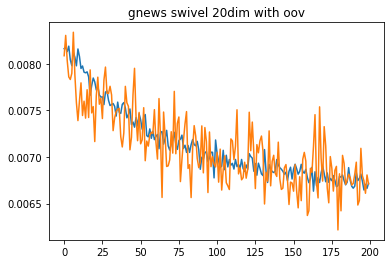

In [37]:
fig, ax = plt.subplots(tight_layout=True)
ax.plot(history.history['val_loss'], label='Val Loss')
ax.plot(history.history['loss'], label='Train Loss')
ax.set(title='gnews swivel 20dim with oov', xlabel='Epoch', ylabel='Log Loss')

gnews-swivel-20dim/1

Train for 95 steps, validate for 10 steps  
Epoch 1/20  
95/95 [==============================] - 3s 35ms/step - loss: 0.6591 - accuracy: 0.5925 - val_loss: 0.5575 - val_accuracy: 0.6907  
Epoch 2/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.4910 - accuracy: 0.7546 - val_loss: 0.4238 - val_accuracy: 0.8021  
Epoch 3/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.3897 - accuracy: 0.8220 - val_loss: 0.3516 - val_accuracy: 0.8433  
Epoch 4/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.3370 - accuracy: 0.8500 - val_loss: 0.3131 - val_accuracy: 0.8587  
Epoch 5/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.3060 - accuracy: 0.8647 - val_loss: 0.2878 - val_accuracy: 0.8793  
Epoch 6/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.2849 - accuracy: 0.8746 - val_loss: 0.2699 - val_accuracy: 0.8859  
Epoch 7/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.2692 - accuracy: 0.8816 - val_loss: 0.2557 - val_accuracy: 0.8935  
Epoch 8/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.2570 - accuracy: 0.8879 - val_loss: 0.2446 - val_accuracy: 0.8979  
Epoch 9/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.2473 - accuracy: 0.8923 - val_loss: 0.2350 - val_accuracy: 0.8999  
Epoch 10/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.2390 - accuracy: 0.8967 - val_loss: 0.2280 - val_accuracy: 0.9049  
Epoch 11/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.2318 - accuracy: 0.8999 - val_loss: 0.2207 - val_accuracy: 0.9073  
Epoch 12/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.2257 - accuracy: 0.9022 - val_loss: 0.2145 - val_accuracy: 0.9098  
Epoch 13/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.2199 - accuracy: 0.9050 - val_loss: 0.2087 - val_accuracy: 0.9127  
Epoch 14/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.2150 - accuracy: 0.9075 - val_loss: 0.2042 - val_accuracy: 0.9150  
Epoch 15/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.2104 - accuracy: 0.9093 - val_loss: 0.1989 - val_accuracy: 0.9174  
Epoch 16/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.2063 - accuracy: 0.9116 - val_loss: 0.1952 - val_accuracy: 0.9205  
Epoch 17/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.2022 - accuracy: 0.9131 - val_loss: 0.1914 - val_accuracy: 0.9240  
Epoch 18/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.1982 - accuracy: 0.9156 - val_loss: 0.1867 - val_accuracy: 0.9217  
Epoch 19/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.1952 - accuracy: 0.9169 - val_loss: 0.1841 - val_accuracy: 0.9217  
Epoch 20/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.1916 - accuracy: 0.9174 - val_loss: 0.1798 - val_accuracy: 0.9263  

gnews-swivel-20dim-with-oov/1

Train for 95 steps, validate for 10 steps  
Epoch 1/20  
95/95 [==============================] - 2s 23ms/step - loss: 0.6693 - accuracy: 0.5871 - val_loss: 0.5567 - val_accuracy: 0.7057  
Epoch 2/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.4968 - accuracy: 0.7483 - val_loss: 0.4298 - val_accuracy: 0.7945  
Epoch 3/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.3933 - accuracy: 0.8203 - val_loss: 0.3504 - val_accuracy: 0.8462  
Epoch 4/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.3341 - accuracy: 0.8510 - val_loss: 0.3058 - val_accuracy: 0.8684  
Epoch 5/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.2998 - accuracy: 0.8680 - val_loss: 0.2785 - val_accuracy: 0.8826  
Epoch 6/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.2772 - accuracy: 0.8787 - val_loss: 0.2585 - val_accuracy: 0.8878  
Epoch 7/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.2608 - accuracy: 0.8863 - val_loss: 0.2446 - val_accuracy: 0.8954  
Epoch 8/20  
95/95 [==============================] - ETA: 0s - loss: 0.2486 - accuracy: 0.89 - 1s 15ms/step - loss: 0.2486 - accuracy: 0.8914 - val_loss: 0.2333 - val_accuracy: 0.9018  
Epoch 9/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.2385 - accuracy: 0.8957 - val_loss: 0.2251 - val_accuracy: 0.9022  
Epoch 10/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.2305 - accuracy: 0.8990 - val_loss: 0.2180 - val_accuracy: 0.9047  
Epoch 11/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.2234 - accuracy: 0.9031 - val_loss: 0.2104 - val_accuracy: 0.9125  
Epoch 12/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.2169 - accuracy: 0.9064 - val_loss: 0.2047 - val_accuracy: 0.9131  
Epoch 13/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.2115 - accuracy: 0.9084 - val_loss: 0.1997 - val_accuracy: 0.9197  
Epoch 14/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.2063 - accuracy: 0.9110 - val_loss: 0.1949 - val_accuracy: 0.9203  
Epoch 15/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.2017 - accuracy: 0.9128 - val_loss: 0.1905 - val_accuracy: 0.9199  
Epoch 16/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.1973 - accuracy: 0.9156 - val_loss: 0.1862 - val_accuracy: 0.9244  
Epoch 17/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.1932 - accuracy: 0.9166 - val_loss: 0.1824 - val_accuracy: 0.9277  
Epoch 18/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.1902 - accuracy: 0.9183 - val_loss: 0.1786 - val_accuracy: 0.9269  
Epoch 19/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.1863 - accuracy: 0.9205 - val_loss: 0.1754 - val_accuracy: 0.9304  
Epoch 20/20  
95/95 [==============================] - 1s 15ms/step - loss: 0.1828 - accuracy: 0.9219 - val_loss: 0.1731 - val_accuracy: 0.9275  

nnlm-en-dim50/1

Train for 95 steps, validate for 10 steps  
Epoch 1/20  
95/95 [==============================] - 28s 296ms/step - loss: 0.5762 - accuracy: 0.6799 - val_loss: 0.4041 - val_accuracy: 0.8365  
Epoch 2/20  
95/95 [==============================] - 27s 286ms/step - loss: 0.3346 - accuracy: 0.8553 - val_loss: 0.2523 - val_accuracy: 0.8892  
Epoch 3/20  
95/95 [==============================] - 27s 286ms/step - loss: 0.2531 - accuracy: 0.8905 - val_loss: 0.2045 - val_accuracy: 0.9117  
Epoch 4/20  
95/95 [==============================] - 27s 289ms/step - loss: 0.2163 - accuracy: 0.9076 - val_loss: 0.1748 - val_accuracy: 0.9285  
Epoch 5/20  
95/95 [==============================] - 27s 289ms/step - loss: 0.1926 - accuracy: 0.9187 - val_loss: 0.1546 - val_accuracy: 0.9368  
Epoch 6/20  
95/95 [==============================] - 27s 289ms/step - loss: 0.1751 - accuracy: 0.9268 - val_loss: 0.1411 - val_accuracy: 0.9444  
Epoch 7/20  
95/95 [==============================] - 27s 289ms/step - loss: 0.1619 - accuracy: 0.9330 - val_loss: 0.1281 - val_accuracy: 0.9460  
Epoch 8/20  
95/95 [==============================] - 27s 289ms/step - loss: 0.1522 - accuracy: 0.9370 - val_loss: 0.1215 - val_accuracy: 0.9578  
Epoch 9/20  
95/95 [==============================] - 27s 289ms/step - loss: 0.1439 - accuracy: 0.9405 - val_loss: 0.1108 - val_accuracy: 0.9574  
Epoch 10/20  
95/95 [==============================] - 27s 289ms/step - loss: 0.1367 - accuracy: 0.9447 - val_loss: 0.1049 - val_accuracy: 0.9607  
Epoch 11/20  
95/95 [==============================] - 27s 289ms/step - loss: 0.1304 - accuracy: 0.9467 - val_loss: 0.1003 - val_accuracy: 0.9627  
Epoch 12/20  
95/95 [==============================] - 28s 293ms/step - loss: 0.1255 - accuracy: 0.9490 - val_loss: 0.0954 - val_accuracy: 0.9611  
Epoch 13/20  
95/95 [==============================] - 29s 307ms/step - loss: 0.1209 - accuracy: 0.9512 - val_loss: 0.0912 - val_accuracy: 0.9660  
Epoch 14/20  
95/95 [==============================] - 30s 319ms/step - loss: 0.1166 - accuracy: 0.9516 - val_loss: 0.0864 - val_accuracy: 0.9660  
Epoch 15/20  
95/95 [==============================] - 34s 355ms/step - loss: 0.1137 - accuracy: 0.9538 - val_loss: 0.0840 - val_accuracy: 0.9683  
Epoch 16/20  
95/95 [==============================] - 34s 357ms/step - loss: 0.1101 - accuracy: 0.9552 - val_loss: 0.0827 - val_accuracy: 0.9642  
Epoch 17/20  
95/95 [==============================] - 34s 356ms/step - loss: 0.1070 - accuracy: 0.9556 - val_loss: 0.0790 - val_accuracy: 0.9691  
Epoch 18/20  
95/95 [==============================] - 34s 357ms/step - loss: 0.1037 - accuracy: 0.9571 - val_loss: 0.0767 - val_accuracy: 0.9716  
Epoch 19/20  
95/95 [==============================] - 34s 357ms/step - loss: 0.1005 - accuracy: 0.9584 - val_loss: 0.0737 - val_accuracy: 0.9738  
Epoch 20/20  
95/95 [==============================] - 35s 368ms/step - loss: 0.0975 - accuracy: 0.9596 - val_loss: 0.0718 - val_accuracy: 0.9708  

nnlm-en-dim128

Train for 95 steps, validate for 10 steps  
Epoch 1/20  
95/95 [==============================] - 28s 291ms/step - loss: 0.6109 - accuracy: 0.6312 - val_loss: 0.4651 - val_accuracy: 0.8175  
Epoch 2/20  
95/95 [==============================] - 26s 270ms/step - loss: 0.3673 - accuracy: 0.8449 - val_loss: 0.2777 - val_accuracy: 0.8836  
Epoch 3/20  
95/95 [==============================] - 26s 270ms/step - loss: 0.2724 - accuracy: 0.8824 - val_loss: 0.2273 - val_accuracy: 0.9032  
Epoch 4/20  
95/95 [==============================] - 26s 270ms/step - loss: 0.2350 - accuracy: 0.8978 - val_loss: 0.1999 - val_accuracy: 0.9203  
Epoch 5/20  
95/95 [==============================] - 26s 270ms/step - loss: 0.2113 - accuracy: 0.9096 - val_loss: 0.1793 - val_accuracy: 0.9267  
Epoch 6/20  
95/95 [==============================] - 26s 271ms/step - loss: 0.1940 - accuracy: 0.9176 - val_loss: 0.1637 - val_accuracy: 0.9351  
Epoch 7/20  
95/95 [==============================] - 26s 273ms/step - loss: 0.1804 - accuracy: 0.9246 - val_loss: 0.1526 - val_accuracy: 0.9419  
Epoch 8/20  
95/95 [==============================] - 26s 273ms/step - loss: 0.1701 - accuracy: 0.9293 - val_loss: 0.1445 - val_accuracy: 0.9448  
Epoch 9/20  
95/95 [==============================] - 26s 273ms/step - loss: 0.1614 - accuracy: 0.9328 - val_loss: 0.1357 - val_accuracy: 0.9458  
Epoch 10/20  
95/95 [==============================] - 26s 273ms/step - loss: 0.1545 - accuracy: 0.9354 - val_loss: 0.1292 - val_accuracy: 0.9458  
Epoch 11/20  
95/95 [==============================] - 26s 273ms/step - loss: 0.1488 - accuracy: 0.9381 - val_loss: 0.1253 - val_accuracy: 0.9467  
Epoch 12/20  
95/95 [==============================] - 26s 273ms/step - loss: 0.1439 - accuracy: 0.9398 - val_loss: 0.1201 - val_accuracy: 0.9504  
Epoch 13/20  
95/95 [==============================] - 26s 273ms/step - loss: 0.1397 - accuracy: 0.9409 - val_loss: 0.1161 - val_accuracy: 0.9530  
Epoch 14/20  
95/95 [==============================] - 26s 273ms/step - loss: 0.1362 - accuracy: 0.9432 - val_loss: 0.1127 - val_accuracy: 0.9555  
Epoch 15/20  
95/95 [==============================] - 26s 273ms/step - loss: 0.1327 - accuracy: 0.9442 - val_loss: 0.1107 - val_accuracy: 0.9543  
Epoch 16/20  
95/95 [==============================] - 26s 273ms/step - loss: 0.1290 - accuracy: 0.9457 - val_loss: 0.1074 - val_accuracy: 0.9578  
Epoch 17/20  
95/95 [==============================] - 26s 274ms/step - loss: 0.1262 - accuracy: 0.9470 - val_loss: 0.1038 - val_accuracy: 0.9563  
Epoch 18/20  
95/95 [==============================] - 26s 274ms/step - loss: 0.1234 - accuracy: 0.9478 - val_loss: 0.1020 - val_accuracy: 0.9568  
Epoch 19/20  
95/95 [==============================] - 27s 281ms/step - loss: 0.1202 - accuracy: 0.9486 - val_loss: 0.0988 - val_accuracy: 0.9613  
Epoch 20/20  
95/95 [==============================] - 28s 295ms/step - loss: 0.1175 - accuracy: 0.9506 - val_loss: 0.0967 - val_accuracy: 0.9611  

# Test Set Metrics

In [11]:
results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

12/12 - 0s - loss: 0.3069 - accuracy: 0.8752
loss: 0.307
accuracy: 0.875
